In [ ]:
import sys

PWD = '..'
sys.path.append(PWD)

import numpy as np

from matplotlib import pyplot as plt

from src.plot_utils import plot_sample
from src.cfd import CFD
from src.cfd_utils import calculate_event_cfd, find_diff_hist_stats

In [ ]:
BEST_CHANNEL = 17

# Load data

In [ ]:
file_name = 'Ntuple_runsampic_166_runtelescope_643_filtered.npz'
all_events = np.load(f'{PWD}/data/{file_name}', allow_pickle=True)['arr_0'].flat[0]

all_events.keys()

dict_keys([17, 11, 23, 16, 24, 29, 28, 22, 10])

In [ ]:
events = all_events[BEST_CHANNEL]

events.keys()

dict_keys(['sample_t0', 'sample_channel', 'eventIDSampic', 'sample_ampl'])

In [ ]:
events['sample_t0']

array([[1.03786352e+10, 1.03786352e+10],
       [1.08594222e+10, 1.08594222e+10],
       [1.15861250e+10, 1.15861250e+10],
       ...,
       [1.74631751e+12, 1.74631751e+12],
       [1.74639822e+12, 1.74639822e+12],
       [1.74654917e+12, 1.74654917e+12]])

# Tests

In [ ]:
selected_events = [0, 3243, 1000, 2000, 3000, 4000, 4500, 5000]

cfd = [CFD(fraction=0.2),CFD(fraction=0.2)]

<Figure size 1440x504 with 0 Axes>

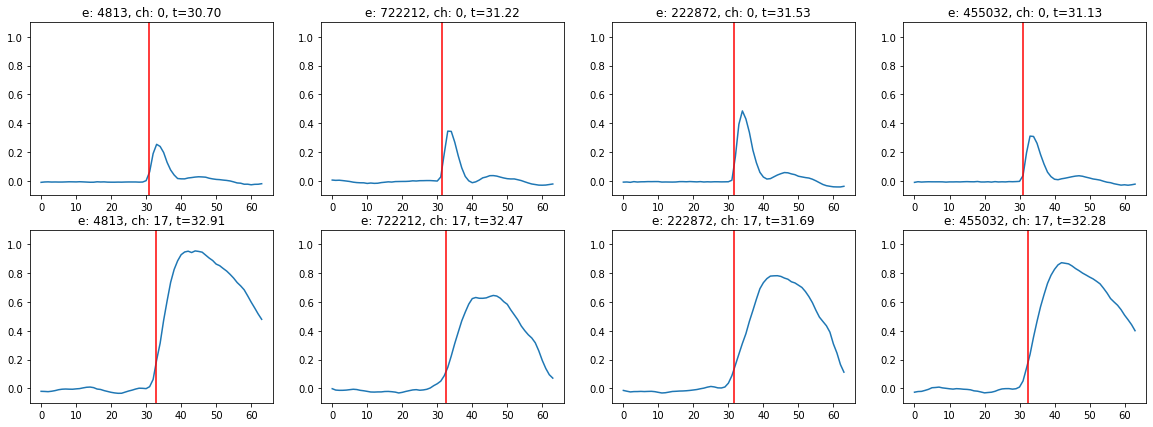

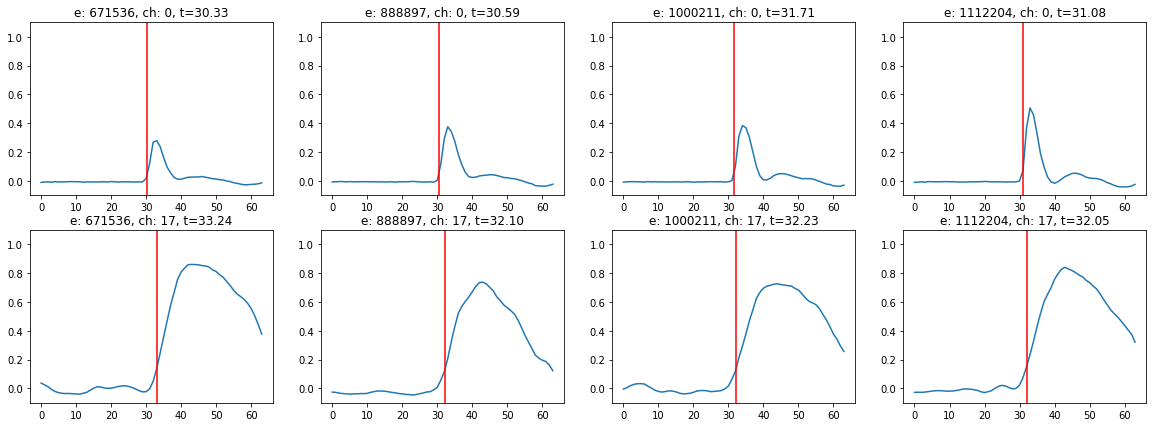

In [ ]:
plt.figure(figsize=(20, 7))
for i, i_event in enumerate(selected_events):
    if i % 4 == 0:
        plt.figure(figsize=(20, 7))

    event_channels = events['sample_channel'][i_event]
    event_ampl = events['sample_ampl'][i_event]
    # print(event_time)
    
    # print('event', i)
    event_cfd_timestamps = calculate_event_cfd(cfd, events, i_event, shift=False)
    
    for j in range(2):
        plt.subplot(2, 4, j * 4 + i % 4 + 1)
        sampic_event = events['eventIDSampic'][i_event]
        plot_sample(event_ampl[j], title=f'e: {sampic_event}, ch: {event_channels[j]}', timestamp=event_cfd_timestamps[j], ylim=True)

    if i % 4 == 3:
        plt.show()
        print('=' * 170)

# Timestamp difference

In [ ]:
N = len(events['sample_t0'])

In [ ]:
cfd = CFD(fraction=0.3)
res = find_diff_hist_stats(cfd, events)
print(f'{res[0]:0.4f} +- {res[1]:0.4f} ns')

In [ ]:
cfd = CFD(fraction=0.8)
res = find_diff_hist_stats(cfd, events)
print(f'{res[0]:0.4f} +- {res[1]:0.4f} ns')

In [ ]:
cfd = CFD(fraction=0.2)
res = find_diff_hist_stats(cfd, events)
print(f'{res[0]:0.4f} +- {res[1]:0.4f} ns')

# Find best fraction

channel=17,fraction=0.05, std=0.1038
channel=17,fraction=0.10, std=0.0838
channel=17,fraction=0.15, std=0.0746
channel=17,fraction=0.20, std=0.0722
channel=17,fraction=0.25, std=0.0723
channel=17,fraction=0.30, std=0.0739
channel=17,fraction=0.35, std=0.0763
channel=17,fraction=0.40, std=0.0795
channel=17,fraction=0.45, std=0.0835
channel=17,fraction=0.50, std=0.0886
channel=17,fraction=0.55, std=0.0947


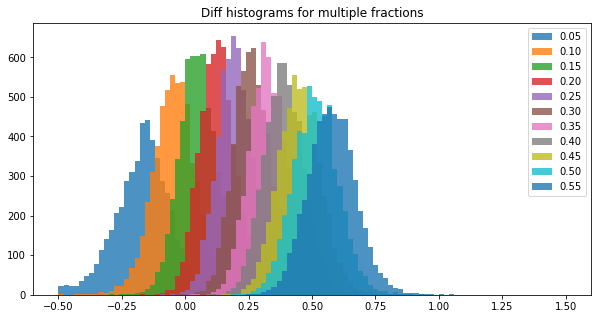

Best: fraction=0.20, std=0.0722
channel=0,fraction=0.05, std=0.0727
channel=0,fraction=0.10, std=0.0725
channel=0,fraction=0.15, std=0.0723
channel=0,fraction=0.20, std=0.0722
channel=0,fraction=0.25, std=0.0719
channel=0,fraction=0.30, std=0.0720
channel=0,fraction=0.35, std=0.0718
channel=0,fraction=0.40, std=0.0719
channel=0,fraction=0.45, std=0.0719
channel=0,fraction=0.50, std=0.0721
channel=0,fraction=0.55, std=0.0722


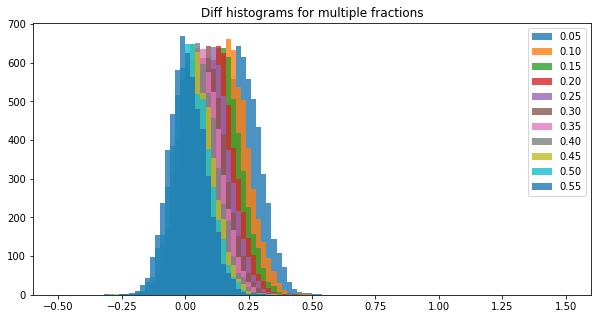

Best: fraction=0.35, std=0.0718


In [31]:
cfd = [CFD(),CFD()]

x_range = np.arange(0.05, 0.6, 0.05)

cfd[0].fraction = 0.2
for y, c in reversed(list(enumerate([0, BEST_CHANNEL]))):
    plt.figure(figsize=(10, 5))
    stds = []
    for i in x_range:    
        cfd[y].fraction = i
        _, std = find_diff_hist_stats(cfd, events, show=False, hist_alpha=0.8, hist_label=f'{i:0.2f}', plot_gauss=False, return_gauss_stats=False)
        print(f'channel={c},fraction={i:0.2f}, std={std:0.4f}')
        stds.append(std)
        # plt.close()

    plt.title('Diff histograms for multiple fractions')
    plt.legend()
    plt.show()
    stds = np.array(stds)
    best_idx = np.argmin(stds)
    cfd[y].fraction = x_range[best_idx]
    print('===============================')
    print(f'Best: fraction={x_range[best_idx]:0.2f}, std={stds[best_idx]:0.4f}')

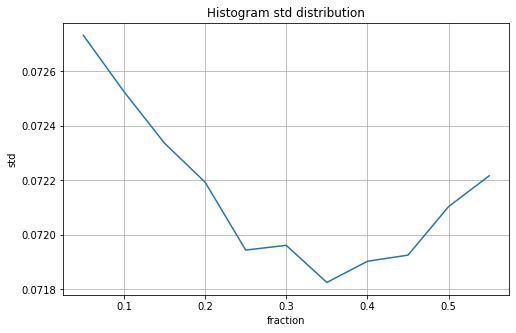

In [32]:
plt.figure(figsize=(8, 5))

plt.plot(x_range, stds)

plt.title('Histogram std distribution')
plt.xlabel('fraction')
plt.ylabel('std')
plt.grid()

plt.show()

# Timestamp distributions

In [ ]:
cfd = CFD(fraction=0.2)

all_timestamps = np.zeros((len(events['sample_channel']), 2))
all_timestamps.shape

In [ ]:
for i in range(len(all_timestamps)):
    all_timestamps[i] = calculate_event_cfd(cfd, events, i)

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(all_timestamps[:, 0], bins=100, range=None)
plt.title('Channel 0')

plt.subplot(1, 2, 2)
plt.hist(all_timestamps[:, 1], bins=100, range=None)
plt.title(f'Channel {BEST_CHANNEL}')

plt.show()

plt.figure(figsize=(14, 5))
plt.hist(all_timestamps[:, 0], bins=100, range=None, label='channel 0', alpha=0.6)
plt.hist(all_timestamps[:, 1], bins=100, range=None, label=f'channel {BEST_CHANNEL}', alpha=0.6)
plt.legend()
plt.show()